In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
#test data 까지 활용한 비지도 학습 -> X 부정행위
#label = f'{crop}_{disease}_{risk}'

#crop       작물에 해당하는 코드    1 : 딸기. 2: 토마토, 3 : 파프리카, 4 : 오이, 5 : 고추, 6 : 시설포도
#disease    정상/ 질병명 구분       코드조합상세참조 (a1 : 딸기잿빛 곰팡이병, a2 : 딸기흰가루병 등등)
#risk       질병피해정도            0 : 정상, 1 : 초기, 2 : 중기, 3 : 말기 

In [2]:
train_csv = pd.read_csv('./train.csv')
train_csv.tail()

,image,label
5762,67640,3_00_0
5763,67644,1_00_0
5764,67647,2_a5_2
5765,67649,1_00_0
5766,67678,5_b6_1


In [3]:
train_label = train_csv['label'].values
print(train_label)

['3_b7_1' '3_00_0' '3_00_0' ... '2_a5_2' '1_00_0' '5_b6_1']


In [4]:
crop_list = []
disease_list = []
risk_list = []
for label in train_label:
  crop, disease, risk = label.split('_')
  crop_list.append(crop)
  disease_list.append(disease)
  risk_list.append(risk)

In [5]:
data = pd.DataFrame()
data['crop'] = pd.Series(crop_list)
data['disease'] = pd.Series(disease_list)
data['risk'] = pd.Series(risk_list)
data.to_csv('plant_dis_info.csv',sep='\t',index=False)
data.tail()

,crop,disease,risk
5762,3,00,0
5763,1,00,0
5764,2,a5,2
5765,1,00,0
5766,5,b6,1


In [6]:
print(f"식물:' {sorted(set(data['crop']))}")
print(f"질병:' {sorted(set(data['disease']))}")
print(f"진행 정도:' {sorted(set(data['risk']))}")

식물:' ['1', '2', '3', '4', '5', '6']
질병:' ['00', 'a11', 'a12', 'a5', 'a7', 'a9', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8']
진행 정도:' ['0', '1', '2', '3']


In [7]:
crop_disease = pd.DataFrame(columns=['00', 'a11', 'a12', 'a5', 'a7', 'a9', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])

for plant in sorted(set(data['crop'])):
    temp = data[data['crop'] == plant]['disease']
    
    #di = pd.DataFrame(columns=['b4', 'a9', 'b5', 'a7', 'b3', 'a12', 'b8', 'b6', '00', 'b7', 'a11', 'a5'])
    
    total = temp.count()
    values = temp.value_counts().apply(lambda x: round(x/total,2))

    crop_disease.loc[f'{plant}({total})'] = values
    
crop_disease = crop_disease.fillna(0)

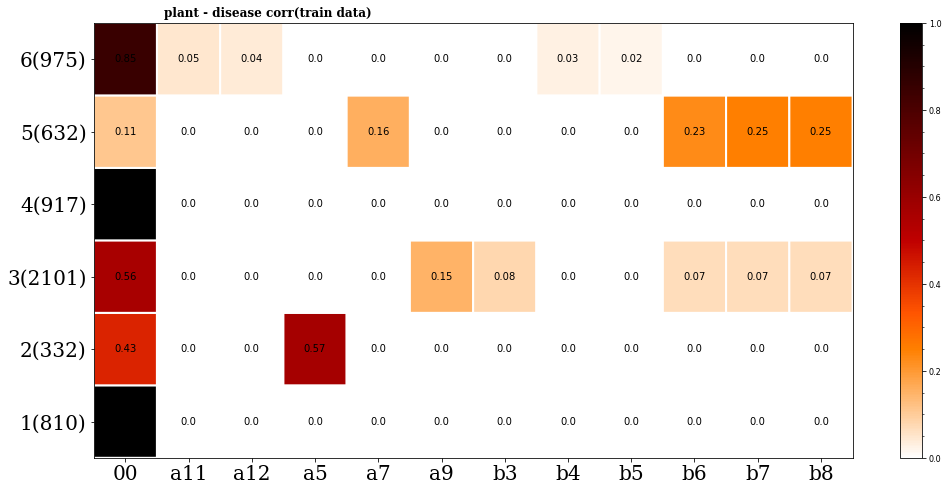

In [57]:
plt.figure(figsize=(17, 8))
plt.pcolor(crop_disease, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(crop_disease.columns), 1), crop_disease.columns, fontsize=20, fontfamily='serif')
plt.yticks(np.arange(0.5, len(crop_disease.index), 1), crop_disease.index, fontsize=20, fontfamily='serif')

for i,c in enumerate(crop_disease.columns):
    for j,d in enumerate(crop_disease.index):
        text = plt.text(i + 0.5,j + 0.5, crop_disease[c][d],
                       ha="center", va="center", color="black")

plt.title('plant - disease corr(train data)', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)

            
cbar.ax.minorticks_on()
plt.show()

In [54]:
crop_risk = pd.DataFrame(columns=['3', '2', '1', '0'])

for plant in sorted(set(data['crop'])):
    temp = data[data['crop'] == plant]['risk']
    
    #di = pd.DataFrame(columns=['b4', 'a9', 'b5', 'a7', 'b3', 'a12', 'b8', 'b6', '00', 'b7', 'a11', 'a5'])
    
    total = temp.count()
    values = temp.value_counts().apply(lambda x: round(x/total,2))

    crop_risk.loc[f'{plant}({total})'] = values
crop_risk = crop_risk.fillna(0)

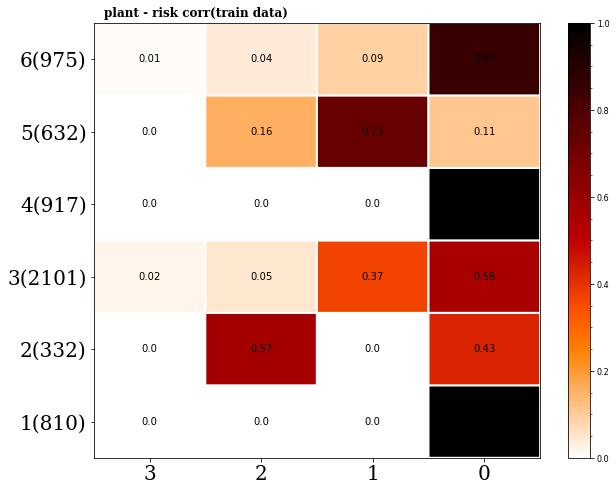

In [55]:
plt.figure(figsize=(10, 8))
plt.pcolor(crop_risk, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(crop_risk.columns), 1), crop_risk.columns, fontsize=20, fontfamily='serif')
plt.yticks(np.arange(0.5, len(crop_risk.index), 1), crop_risk.index, fontsize=20, fontfamily='serif')

for i,c in enumerate(crop_risk.columns):
    for j,d in enumerate(crop_risk.index):
        text = plt.text(i + 0.5,j + 0.5, crop_risk[c][d],
                       ha="center", va="center", color="black")

plt.title('plant - risk corr(train data)', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)    
cbar.ax.minorticks_on()
plt.show()  

In [52]:
disease_crop = pd.DataFrame(columns=['1', '2', '3', '4', '5', '6'])

for di in sorted(set(data['disease'])):
    temp = data[data['disease'] == di]['crop']
    
    total = temp.count()
    values = temp.value_counts().apply(lambda x: round(x/total,2))

    disease_crop.loc[f'{di}({total})'] = values
disease_crop = disease_crop.fillna(0)

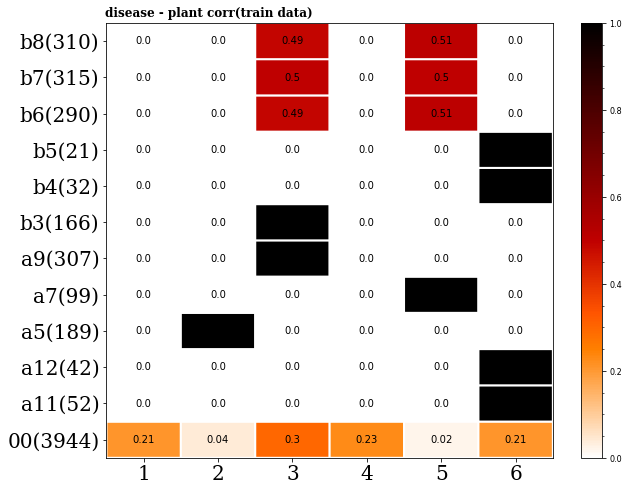

In [53]:
plt.figure(figsize=(10, 8))
plt.pcolor(disease_crop, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(disease_crop.columns), 1), disease_crop.columns, fontsize=20, fontfamily='serif')
plt.yticks(np.arange(0.5, len(disease_crop.index), 1), disease_crop.index, fontsize=20, fontfamily='serif')

for i,c in enumerate(disease_crop.columns):
    for j,d in enumerate(disease_crop.index):
        text = plt.text(i + 0.5,j + 0.5, disease_crop[c][d],
                       ha="center", va="center", color="black")

plt.title('disease - plant corr(train data)', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)    
cbar.ax.minorticks_on()
plt.show()  

In [61]:
disease_risk = pd.DataFrame(columns=['3', '2', '1', '0'])

for di in sorted(set(data['disease'])):
    temp = data[data['disease'] == di]['risk']
    
    total = temp.count()
    values = temp.value_counts().apply(lambda x: round(x/total,2))

    disease_risk.loc[f'{di}({total})'] = values
disease_risk = disease_risk.fillna(0)

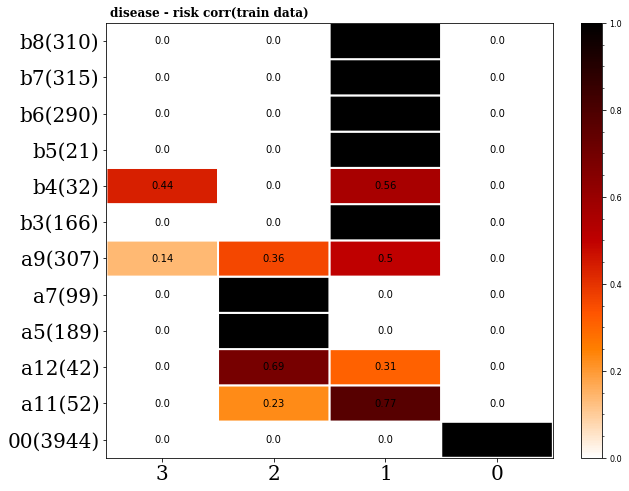

In [64]:
plt.figure(figsize=(10, 8))
plt.pcolor(disease_risk, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(disease_risk.columns), 1), disease_risk.columns, fontsize=20, fontfamily='serif')
plt.yticks(np.arange(0.5, len(disease_risk.index), 1), disease_risk.index, fontsize=20, fontfamily='serif')

for i,c in enumerate(disease_risk.columns):
    for j,d in enumerate(disease_risk.index):
        text = plt.text(i + 0.5,j + 0.5, disease_risk[c][d],
                       ha="center", va="center", color="black")

plt.title('disease - risk corr(train data)', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)    
cbar.ax.minorticks_on()
plt.show()

In [65]:
risk_disease = pd.DataFrame(columns=['00', 'a11', 'a12', 'a5', 'a7', 'a9', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'])

for di in sorted(set(data['risk'])):
    temp = data[data['risk'] == di]['disease']
    
    total = temp.count()
    values = temp.value_counts().apply(lambda x: round(x/total,2))

    risk_disease.loc[f'{di}({total})'] = values
risk_disease = risk_disease.fillna(0)

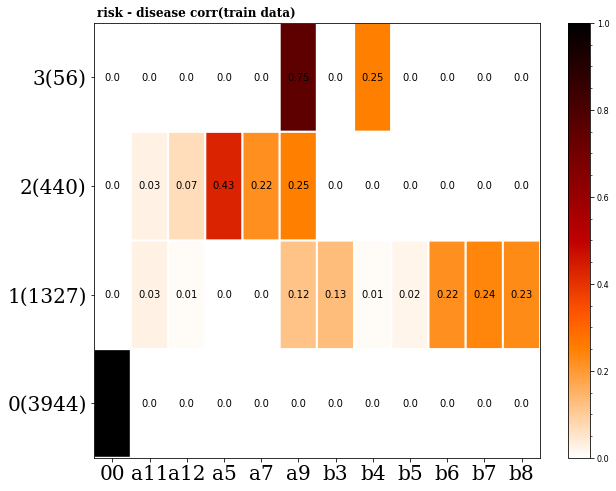

In [66]:
plt.figure(figsize=(10, 8))
plt.pcolor(risk_disease, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(risk_disease.columns), 1), risk_disease.columns, fontsize=20, fontfamily='serif')
plt.yticks(np.arange(0.5, len(risk_disease.index), 1), risk_disease.index, fontsize=20, fontfamily='serif')

for i,c in enumerate(risk_disease.columns):
    for j,d in enumerate(risk_disease.index):
        text = plt.text(i + 0.5,j + 0.5, risk_disease[c][d],
                       ha="center", va="center", color="black")

plt.title('risk - disease corr(train data)', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.23, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)    
cbar.ax.minorticks_on()
plt.show()  

In [4]:
from glob import glob
from PIL import Image

In [2]:
path = 'C:/Users/Lee/Downloads/sample (3)/sample_data/sample_data/*/*.jpg'
images = glob(path)

In [6]:
Image.open('C:/Users/Lee/Downloads/sample (3)/sample_data/sample_data\\10000\\10000.jpg').size

(682, 512)

In [9]:
file_sizes = []
for image_path in images:
    image_size = Image.open(image_path).size
    file_sizes.append(image_size)

In [12]:
set(file_sizes)

{(242, 512),
 (262, 512),
 (384, 512),
 (622, 512),
 (682, 512),
 (740, 512),
 (1081, 512)}

In [15]:
crop_disease_blinder = {}
for plant in sorted(set(data['crop'])):
    temp = data[data['crop'] == plant]['disease']
    
    crop_disease_blinder[plant] = list(set(temp))
    
disease_risk_blinder = {}
for disease in sorted(set(data['disease'])):
    temp = data[data['disease'] == disease]['risk']
    
    disease_risk_blinder[disease] = list(set(temp))


In [14]:
crop_disease_blinder

{'1': ['00'],
 '2': ['00', 'a5'],
 '3': ['b6', 'b8', 'b7', '00', 'b3', 'a9'],
 '4': ['00'],
 '5': ['a7', 'b6', 'b8', '00', 'b7'],
 '6': ['b4', 'a11', '00', 'b5', 'a12']}

In [17]:
disease_risk_blinder

{'00': ['0'],
 'a11': ['2', '1'],
 'a12': ['2', '1'],
 'a5': ['2'],
 'a7': ['2'],
 'a9': ['2', '3', '1'],
 'b3': ['1'],
 'b4': ['3', '1'],
 'b5': ['1'],
 'b6': ['1'],
 'b7': ['1'],
 'b8': ['1']}

In [45]:
crop_encoder = {'1':0, '2':1, '3':2, '4':3, '5':4, '6':5}
disease_encoder = {'00':0, 'a11':1, 'a12':2, 'a5':3, 'a7':4, 'a9':5, 'b3':6, 'b4':7, 'b5':8, 'b6':9, 'b7':10, 'b8':11}

crop_disease_blinder = {}
for plant in sorted(set(data['crop'])):
    temp = data[data['crop'] == plant]['disease']

    blind_value = ['00', 'a11', 'a12', 'a5', 'a7', 'a9', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8'] 
    for value in list(set(temp)):
        blind_value.remove(value)
    
    crop_disease_blinder[crop_encoder[plant]] = [ disease_encoder[key] for key in blind_value]

In [46]:
crop_disease_blinder

{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 1: [1, 2, 4, 5, 6, 7, 8, 9, 10, 11],
 2: [1, 2, 3, 4, 7, 8],
 3: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 4: [1, 2, 3, 5, 6, 7, 8],
 5: [3, 4, 5, 6, 9, 10, 11]}

In [47]:
disease_encoder = {'00':0, 'a11':1, 'a12':2, 'a5':3, 'a7':4, 'a9':5, 'b3':6, 'b4':7, 'b5':8, 'b6':9, 'b7':10, 'b8':11}

disease_risk_blinder = {}
for disease in sorted(set(data['disease'])):
    temp = data[data['disease'] == disease]['risk']
    
    blind_value = ['0', '1', '2', '3']
    for value in list(set(temp)):
        blind_value.remove(value)
    
    disease_risk_blinder[disease_encoder[disease]] = blind_value

In [48]:
disease_risk_blinder

{0: ['1', '2', '3'],
 1: ['0', '3'],
 2: ['0', '3'],
 3: ['0', '1', '3'],
 4: ['0', '1', '3'],
 5: ['0'],
 6: ['0', '2', '3'],
 7: ['0', '2'],
 8: ['0', '2', '3'],
 9: ['0', '2', '3'],
 10: ['0', '2', '3'],
 11: ['0', '2', '3']}

In [89]:
import numpy as np
import sys
sys.path.append('../')
from utils import custom_beam_search_decoder

In [94]:
a = np.array([[1,2,3,4]])
for j,i in enumerate(a):
    print(i[[1,2]])

[2 3]


In [95]:
from math import log
log(-np.inf)

ValueError: math domain error

In [85]:
class a():
    def __init__(self) -> None:
        self.b = {1:1,2:2}
    def run(self):
        c = self.b
        print(c)

In [86]:
A = a()
A.run()

{1: 1, 2: 2}
